# ASSOCIATION RULE 
WITH OVERALL SATISFACTION AND THE OTHER SATISFACTION

Express how product/services relate to each other, and tend to group together.

In [137]:
#vanno importate pandas e numpy e matplot per fare i grafici
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split  
from pandas import DataFrame

In [138]:
df = pd.read_csv(r'C:\Users\jigok\OneDrive\Desktop\UniPISA\1semestre1Anno\Data Mining\Progetto\Dataset AR\All_values_Train_HR_Employee_Attrition_AllSatisfaction.csv')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       883 non-null    float64
 1   Attrition                 883 non-null    object 
 2   BusinessTravel            883 non-null    object 
 3   DistanceFromHome          883 non-null    int64  
 4   Education                 883 non-null    int64  
 5   EnvironmentSatisfaction   883 non-null    int64  
 6   Gender                    883 non-null    object 
 7   JobInvolvement            883 non-null    int64  
 8   JobLevel                  883 non-null    int64  
 9   JobRole                   883 non-null    object 
 10  JobSatisfaction           883 non-null    int64  
 11  MonthlyIncome             883 non-null    float64
 12  NumCompaniesWorked        883 non-null    int64  
 13  OverTime                  883 non-null    object 
 14  PercentSal

In [140]:
#discretizzo OverallSatisfaction
def labels(x):
    if  1.0 <= x <= 1.5:
        return(1)
    elif 1.6 <= x <= 2.5:
        return(2)
    elif 2.6 <= x <= 3.5:
        return(3)
    elif 3.6 <= x <= 4.5:
        return(4)
    else:
        return(4)

df['OverallSatisfaction'] = df['OverallSatisfaction'].apply(lambda x: labels(x))
#arrotondo le medie
df.head(5)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,MonthlyHours,OverallSatisfaction,TaxRate
0,52.0,No,Travel_Rarely,9,4,2,Male,3,3,Research Director,...,17,3,0,2.0,2,8.0,7,156.613636,3,0.387172
1,36.0,No,Travel_Rarely,1,1,2,Male,3,5,Manager,...,14,3,1,3.0,3,1.0,8,157.942308,3,0.411421
2,25.0,No,Travel_Frequently,16,3,3,Male,3,2,Sales Executive,...,25,3,1,4.0,3,1.0,5,448.055556,3,0.704402
3,33.0,No,Travel_Rarely,5,4,2,Male,3,1,Research Scientist,...,14,2,0,1.0,3,3.0,7,271.907692,2,0.841632
4,31.0,No,Travel_Rarely,9,2,3,Female,3,1,Laboratory Technician,...,12,3,0,2.0,3,10.0,2,106.373333,3,0.207947


In [141]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,MonthlyHours,OverallSatisfaction,TaxRate
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,36.554926,9.201586,2.886750,2.684032,2.750849,1.919592,2.703284,6932.335221,2.836920,15.207248,2.716874,0.793884,2.665912,2.767837,6.326161,3.919592,234.245826,2.725934,0.463811
std,8.266129,8.241818,1.008285,1.092567,0.729354,1.007506,1.087061,5453.370217,2.484993,3.589332,1.078137,0.865362,1.187828,0.721713,4.523567,3.435392,130.196628,0.523459,0.320030
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,26.043478,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3072.000000,1.000000,12.000000,2.000000,0.000000,2.000000,2.000000,3.000000,2.000000,130.630208,2.000000,0.129730
50%,35.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,5079.000000,2.000000,14.000000,3.000000,1.000000,2.000000,3.000000,5.000000,3.000000,212.279070,3.000000,0.528359
75%,42.000000,14.000000,4.000000,4.000000,3.000000,2.000000,4.000000,8840.500000,4.000000,18.000000,4.000000,1.000000,3.000000,3.000000,9.000000,7.000000,309.906250,3.000000,0.762560
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,26997.000000,9.000000,25.000000,4.000000,3.000000,6.000000,4.000000,20.000000,16.000000,590.976744,4.000000,0.951396


BINNING

In [142]:
#numero bin con la distribuzione istogrammi variabili
#Apply binning to continuous features

df['AgeBin'] = pd.cut(df['Age'].astype(int), 6, right=False)
df['DistanceFromHomeBin'] = pd.cut(df['DistanceFromHome'].astype(int), 10, right=False)
df['PercentSalaryHikeBin'] = pd.cut(df['PercentSalaryHike'].astype(int), 5, right=False)
df['MonthlyIncomeBin'] = pd.cut(df['MonthlyIncome'].astype(int), 10, right=False)
df['MonthlyHoursBin'] = pd.cut(df['MonthlyHours'].astype(int), 10, right=False)



df.drop(['Age', 'MonthlyIncome', 'MonthlyHours','DistanceFromHome','PercentSalaryHike'], axis=1, inplace=True)

df.head()

,Attrition,BusinessTravel,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,OverallSatisfaction,TaxRate,AgeBin,DistanceFromHomeBin,PercentSalaryHikeBin,MonthlyIncomeBin,MonthlyHoursBin
0,No,Travel_Rarely,4,2,Male,3,3,Research Director,3,9,...,2,8.0,7,3,0.387172,"[46.0, 53.0)","[6.6, 9.4)","[16.6, 19.4)","[6206.6, 8805.4)","[138.8, 195.2)"
1,No,Travel_Rarely,1,2,Male,3,5,Manager,3,1,...,3,1.0,8,3,0.411421,"[32.0, 39.0)","[1.0, 3.8)","[13.8, 16.6)","[3607.8, 6206.6)","[138.8, 195.2)"
2,No,Travel_Frequently,3,3,Male,3,2,Sales Executive,4,1,...,3,1.0,5,3,0.704402,"[25.0, 32.0)","[15.0, 17.8)","[22.2, 25.014)","[3607.8, 6206.6)","[420.8, 477.2)"
3,No,Travel_Rarely,4,2,Male,3,1,Research Scientist,2,2,...,3,3.0,7,2,0.841632,"[32.0, 39.0)","[3.8, 6.6)","[13.8, 16.6)","[1009.0, 3607.8)","[251.6, 308.0)"
4,No,Travel_Rarely,2,3,Female,3,1,Laboratory Technician,4,1,...,3,10.0,2,3,0.207947,"[25.0, 32.0)","[6.6, 9.4)","[11.0, 13.8)","[6206.6, 8805.4)","[82.4, 138.8)"


MAPPING

In [143]:
df['Education'] = df['Education'].map(
    {1: 'Below College', 2: 'College', 3:'Bachelor', 4:'Master', 5:'Doctor'}).astype(str)
df['OverallSatisfaction'] = df['OverallSatisfaction'].map(
    {1: 'Low', 2: 'Medium', 3:'High', 4:'Very High'}).astype(str)+'_Overall'
df['JobLevel'] = df['JobLevel'].map(
    {1: 'EntryLevel', 2: 'MidLevel', 3:'SeniorLevel', 4:'Manager', 5:'Director'}).astype(str)


df['AgeBin'] = df['AgeBin'].astype(str) + '_Age'
df['MonthlyIncomeBin'] = df['MonthlyIncomeBin'].astype(str) + '_Income'
df['MonthlyHoursBin'] = df['MonthlyHoursBin'].astype(str) + '_Hours'
df['DistanceFromHomeBin'] = df['DistanceFromHomeBin'].astype(str) + '_Distance'
df['YearsAtCompany'] = df['YearsAtCompany'].astype(str) + '_YearsAtCompany'
df['PercentSalaryHikeBin'] = df['PercentSalaryHikeBin'].astype(str) + '_%'

df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype(str) + '_companies'
df['StockOptionLevel'] = df['StockOptionLevel'].astype(str) + '_stockOption'
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].astype(str) + '_Time'
df['YearsInCurrentRole'] = df['YearsInCurrentRole'].astype(str) + '_YearsInCurrentRole'
df['TaxRate'] = df['TaxRate'].astype(str) + '_TaxRate'
df['OverTime'] = df['OverTime'].astype(str) + '_OverTime'
df['Attrition'] = df['Attrition'].astype(str) + '_Attrition'

#add
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype(str) + '_ESat'
df['JobSatisfaction'] = df['JobSatisfaction'].astype(str) + '_JSat'
df['JobInvolvement'] = df['JobInvolvement'].astype(str) + '_JIvol'
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype(str) + '_WLBalance'
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].astype(str) + '_RSat'

df.head(5)

,Attrition,BusinessTravel,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,OverallSatisfaction,TaxRate,AgeBin,DistanceFromHomeBin,PercentSalaryHikeBin,MonthlyIncomeBin,MonthlyHoursBin
0,No_Attrition,Travel_Rarely,Master,2_ESat,Male,3_JIvol,SeniorLevel,Research Director,3_JSat,9_companies,...,2_WLBalance,8.0_YearsAtCompany,7_YearsInCurrentRole,High_Overall,0.3871716731969235_TaxRate,"[46.0, 53.0)_Age","[6.6, 9.4)_Distance","[16.6, 19.4)_%","[6206.6, 8805.4)_Income","[138.8, 195.2)_Hours"
1,No_Attrition,Travel_Rarely,Below College,2_ESat,Male,3_JIvol,Director,Manager,3_JSat,1_companies,...,3_WLBalance,1.0_YearsAtCompany,8_YearsInCurrentRole,High_Overall,0.4114209180567393_TaxRate,"[32.0, 39.0)_Age","[1.0, 3.8)_Distance","[13.8, 16.6)_%","[3607.8, 6206.6)_Income","[138.8, 195.2)_Hours"
2,No_Attrition,Travel_Frequently,Bachelor,3_ESat,Male,3_JIvol,MidLevel,Sales Executive,4_JSat,1_companies,...,3_WLBalance,1.0_YearsAtCompany,5_YearsInCurrentRole,High_Overall,0.7044017358958462_TaxRate,"[25.0, 32.0)_Age","[15.0, 17.8)_Distance","[22.2, 25.014)_%","[3607.8, 6206.6)_Income","[420.8, 477.2)_Hours"
3,No_Attrition,Travel_Rarely,Master,2_ESat,Male,3_JIvol,EntryLevel,Research Scientist,2_JSat,2_companies,...,3_WLBalance,3.0_YearsAtCompany,7_YearsInCurrentRole,Medium_Overall,0.8416317754894195_TaxRate,"[32.0, 39.0)_Age","[3.8, 6.6)_Distance","[13.8, 16.6)_%","[1009.0, 3607.8)_Income","[251.6, 308.0)_Hours"
4,No_Attrition,Travel_Rarely,College,3_ESat,Female,3_JIvol,EntryLevel,Laboratory Technician,4_JSat,1_companies,...,3_WLBalance,10.0_YearsAtCompany,2_YearsInCurrentRole,High_Overall,0.20794685384808226_TaxRate,"[25.0, 32.0)_Age","[6.6, 9.4)_Distance","[11.0, 13.8)_%","[6206.6, 8805.4)_Income","[82.4, 138.8)_Hours"


# Creo i Baskets

In [144]:
baskets = df.values.tolist()

In [145]:
baskets[0]

['No_Attrition',
 'Travel_Rarely',
 'Master',
 '2_ESat',
 'Male',
 '3_JIvol',
 'SeniorLevel',
 'Research Director',
 '3_JSat',
 '9_companies',
 'No_OverTime',
 '3_RSat',
 '0_stockOption',
 '2.0_Time',
 '2_WLBalance',
 '8.0_YearsAtCompany',
 '7_YearsInCurrentRole',
 'High_Overall',
 '0.3871716731969235_TaxRate',
 '[46.0, 53.0)_Age',
 '[6.6, 9.4)_Distance',
 '[16.6, 19.4)_%',
 '[6206.6, 8805.4)_Income',
 '[138.8, 195.2)_Hours']

# Apriori Algorithm

In [146]:
from fim import apriori

In [147]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

# Description of the Value

We have decide to do some proves with different characterized value of support. This value are 2,10,20,30,40,50,60,70,80,90.
After that we have to do some proves with different type of target , a for frequent itemset, m for maximal itemset e c for closed itemset. 

For choosing the best combination we try to create the frequent itemset with different min value from the range 0-24.

We find that for have rules with 'Yes_Attrition' the range value of support that we have to analyze is between 2 and 10. So in this File ther'is the study of AR with this Support Value.

# Histogram-Frequent itemsets

Frequent Itemsets with min value in a range 0 to 10

In [148]:
import matplotlib.pyplot as plt
global_list=[]
global_list1=[]
global_list2=[]
global_list3=[]
global_list4=[]
global_list5=[]
global_list6=[]
global_list7=[]
global_list8=[]
zmin = 0
for zmin in range (10):
        itemset = apriori(baskets, supp=2, report ='s', target='a',zmin = zmin)
        itemset1 = apriori(baskets, supp=3, report ='s', target='a',zmin = zmin)
        itemset2 = apriori(baskets, supp=4, report ='s', target='a',zmin = zmin)
        itemset3 = apriori(baskets, supp=5, report ='s', target='a',zmin = zmin)
        itemset4 = apriori(baskets, supp=6, report ='s', target='a',zmin = zmin)
        itemset5 = apriori(baskets, supp=7, report ='s', target='a',zmin = zmin)
        itemset6 = apriori(baskets, supp=8, report ='s', target='a',zmin = zmin)
        itemset7 = apriori(baskets, supp=9, report ='s', target='a',zmin = zmin)
        itemset8 = apriori(baskets, supp=10, report ='s', target='a',zmin = zmin)
        global_list.append(len(itemset))
        global_list1.append(len(itemset1))
        global_list2.append(len(itemset2))
        global_list3.append(len(itemset3))
        global_list4.append(len(itemset4))
        global_list5.append(len(itemset5))
        global_list6.append(len(itemset6))
        global_list7.append(len(itemset7))
        global_list8.append(len(itemset8))
        


Da 2 a 5 support

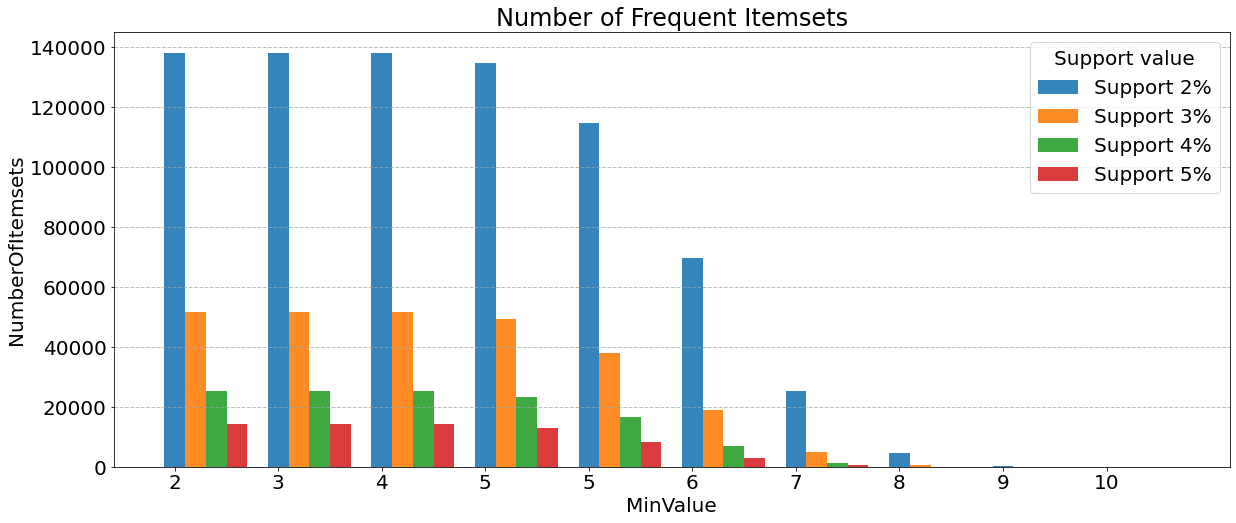

In [149]:
width = 0.2
lables1 =['2','3','4','5','5','6','7','8','9','10' ]
plt.xticks(range(len(global_list)), lables1)
sns.color_palette("Set2")
plt.bar(range(len(global_list)), global_list, alpha=0.9,width=width,label ='Support 2%')
plt.bar(np.arange(len(global_list1))+width, global_list1, alpha=0.9,width=width,label ='Support 3%')
plt.bar(np.arange(len(global_list2))+width+width, global_list2, alpha=0.9,width=width,label ='Support 4%')
plt.bar(np.arange(len(global_list3))+width+width+width, global_list3, alpha=0.9,width=width,label ='Support 5%')

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams.update({'font.size': 20})
plt.legend(loc="best", title="Support value")
plt.xlabel('MinValue')
plt.ylabel('NumberOfItemsets')
plt.title('Number of Frequent Itemsets')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

Da 6 a 10 support

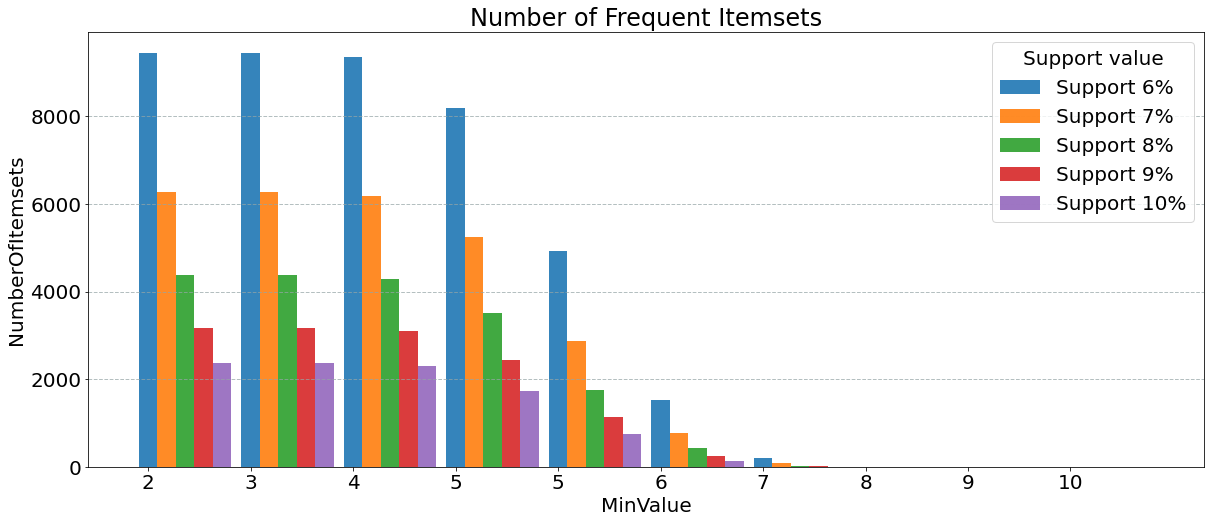

In [150]:
width = 0.18
lables1 =['2','3','4','5','5','6','7','8','9','10']
plt.xticks(range(len(global_list4)), lables1)
plt.bar(range(len(global_list4)), global_list4, alpha=0.9,width=width,label ='Support 6%')
plt.bar(np.arange(len(global_list5))+width, global_list5, alpha=0.9,width=width,label ='Support 7%')
plt.bar(np.arange(len(global_list6))+width+width, global_list6, alpha=0.9,width=width,label ='Support 8%')
plt.bar(np.arange(len(global_list7))+width+width+width, global_list7,alpha=0.9,width=width,label ='Support 9%')
plt.bar(np.arange(len(global_list8))+width+width+width+width, global_list8, alpha=0.9,width=width,label ='Support 10%')

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams.update({'font.size': 20})
plt.legend(loc="best", title="Support value")
plt.xlabel('MinValue')
plt.ylabel('NumberOfItemsets')
plt.title('Number of Frequent Itemsets')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

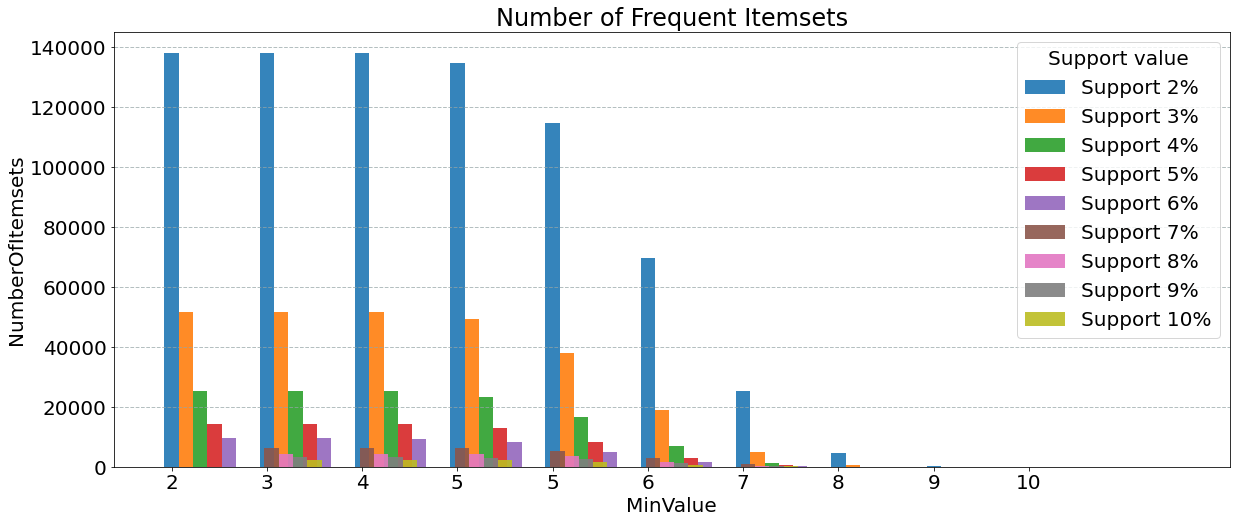

In [151]:
width = 0.15
lables1 =['2','3','4','5','5','6','7','8','9','10']
plt.xticks(range(len(global_list)), lables1)
plt.bar(range(len(global_list)), global_list, alpha=0.9,width=width,label ='Support 2%')
plt.bar(np.arange(len(global_list1))+width, global_list1, alpha=0.9,width=width,label ='Support 3%')
plt.bar(np.arange(len(global_list2))+width+width, global_list2, alpha=0.9,width=width,label ='Support 4%')
plt.bar(np.arange(len(global_list3))+width+width+width, global_list3, alpha=0.9,width=width,label ='Support 5%')
plt.bar(np.arange(len(global_list4))+width+width+width+width, global_list4, alpha=0.9,width=width,label ='Support 6%')
plt.bar(np.arange(len(global_list5))+width+width+width+width+width+width+width, global_list5, alpha=0.9,width=width,label ='Support 7%')
plt.bar(np.arange(len(global_list6))+width+width+width+width+width+width+width+width, global_list6, alpha=0.9,width=width,label ='Support 8%')
plt.bar(np.arange(len(global_list7))+width+width+width+width+width+width+width+width+width, global_list7,alpha=0.9,width=width,label ='Support 9%')
plt.bar(np.arange(len(global_list8))+width+width+width+width+width+width+width+width+width+width, global_list8, alpha=0.9,width=width,label ='Support 10%')

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams.update({'font.size': 20})
plt.legend(loc="best", title="Support value")
plt.xlabel('MinValue')
plt.ylabel('NumberOfItemsets')
plt.title('Number of Frequent Itemsets')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

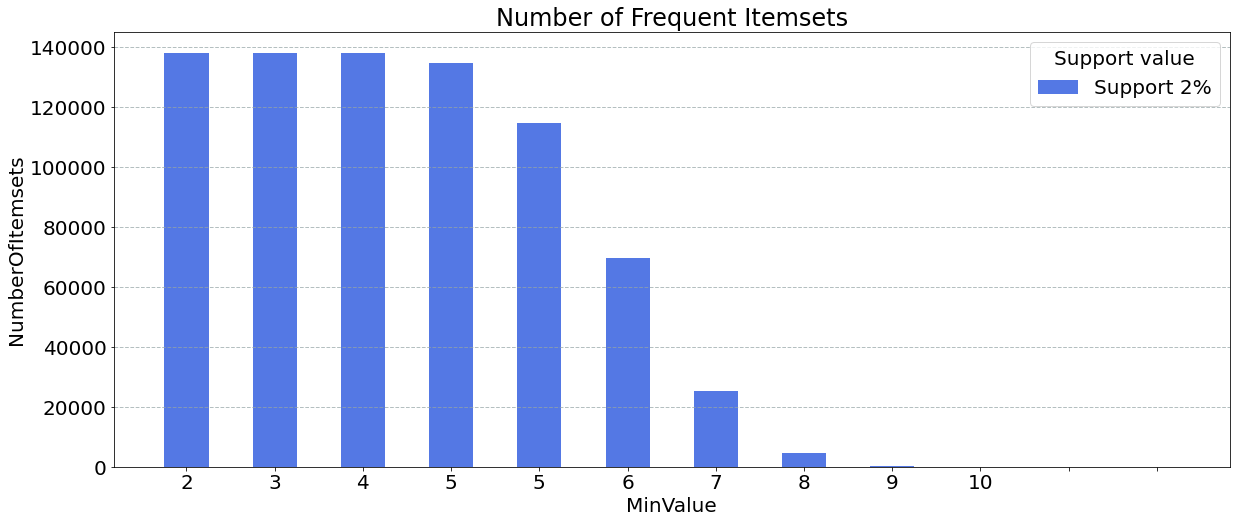

In [152]:
import matplotlib.pyplot as plt
global_list=[]
zmin = 0
for zmin in range (12):
        itemset = apriori(baskets, supp=2, report ='s', target='a',zmin = zmin)
        global_list.append(len(itemset))

width = 0.5
lables1 =['2','3','4','5','5','6','7','8','9','10']
plt.xticks(range(len(global_list)), lables1)
plt.bar(range(len(global_list)), global_list, color='royalblue', alpha=0.9,width=width,label ='Support 2%')

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams.update({'font.size': 20})

plt.legend(loc="best", title="Support value")
plt.xlabel('MinValue')
plt.ylabel('NumberOfItemsets')
plt.title('Number of Frequent Itemsets')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)

plt.show()

# Histogram-Maximal Itemsets

Maximal Itemset with min value in a range 0 to 10

In [153]:
import matplotlib.pyplot as plt
global_list=[]
global_list1=[]
global_list2=[]
global_list3=[]
global_list4=[]
global_list5=[]
global_list6=[]
global_list7=[]
global_list8=[]
zmin = 0
for zmin in range (10):
        itemset = apriori(baskets, supp=2, report ='s', target='m',zmin = zmin)
        itemset1 = apriori(baskets, supp=3, report ='s', target='m',zmin = zmin)
        itemset2 = apriori(baskets, supp=4, report ='s', target='m',zmin = zmin)
        itemset3 = apriori(baskets, supp=5, report ='s', target='m',zmin = zmin)
        itemset4 = apriori(baskets, supp=6, report ='s', target='m',zmin = zmin)
        itemset5 = apriori(baskets, supp=7, report ='s', target='m',zmin = zmin)
        itemset6 = apriori(baskets, supp=8, report ='s', target='m',zmin = zmin)
        itemset7 = apriori(baskets, supp=9, report ='s', target='m',zmin = zmin)
        itemset8 = apriori(baskets, supp=10, report ='s', target='m',zmin = zmin)
        global_list.append(len(itemset))
        global_list1.append(len(itemset1))
        global_list2.append(len(itemset2))
        global_list3.append(len(itemset3))
        global_list4.append(len(itemset4))
        global_list5.append(len(itemset5))
        global_list6.append(len(itemset6))
        global_list7.append(len(itemset7))
        global_list8.append(len(itemset8))
        


Da 2 a 5 support

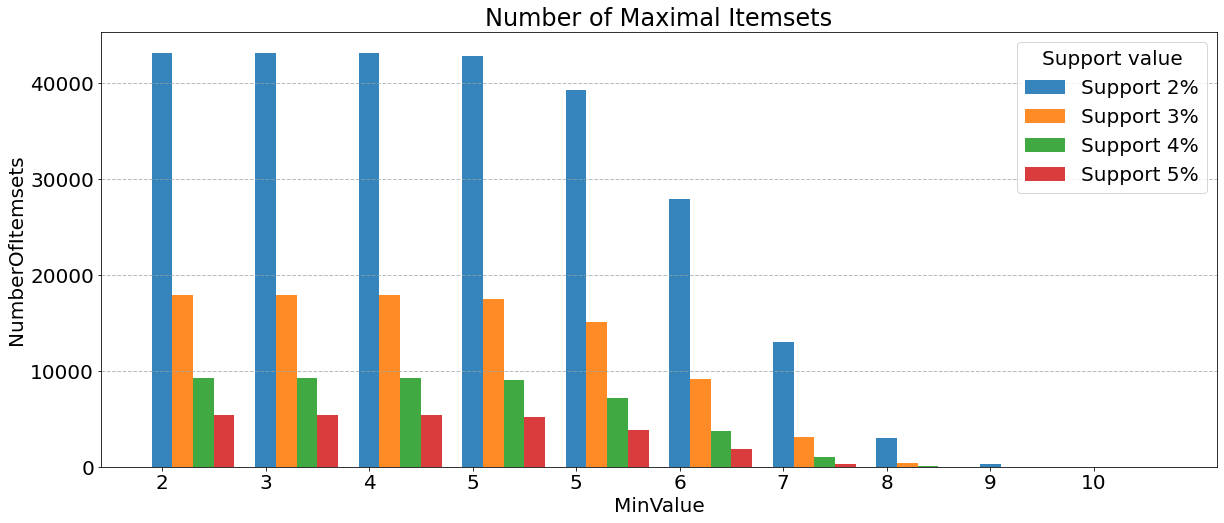

In [154]:
width = 0.2
lables1 =['2','3','4','5','5','6','7','8','9','10' ]
plt.xticks(range(len(global_list)), lables1)
plt.bar(range(len(global_list)), global_list, alpha=0.9,width=width,label ='Support 2%')
plt.bar(np.arange(len(global_list1))+width, global_list1, alpha=0.9,width=width,label ='Support 3%')
plt.bar(np.arange(len(global_list2))+width+width, global_list2, alpha=0.9,width=width,label ='Support 4%')
plt.bar(np.arange(len(global_list3))+width+width+width, global_list3, alpha=0.9,width=width,label ='Support 5%')

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams.update({'font.size': 20})
plt.legend(loc="best", title="Support value")
plt.xlabel('MinValue')
plt.ylabel('NumberOfItemsets')
plt.title('Number of Maximal Itemsets')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

Da 6 a 10 support

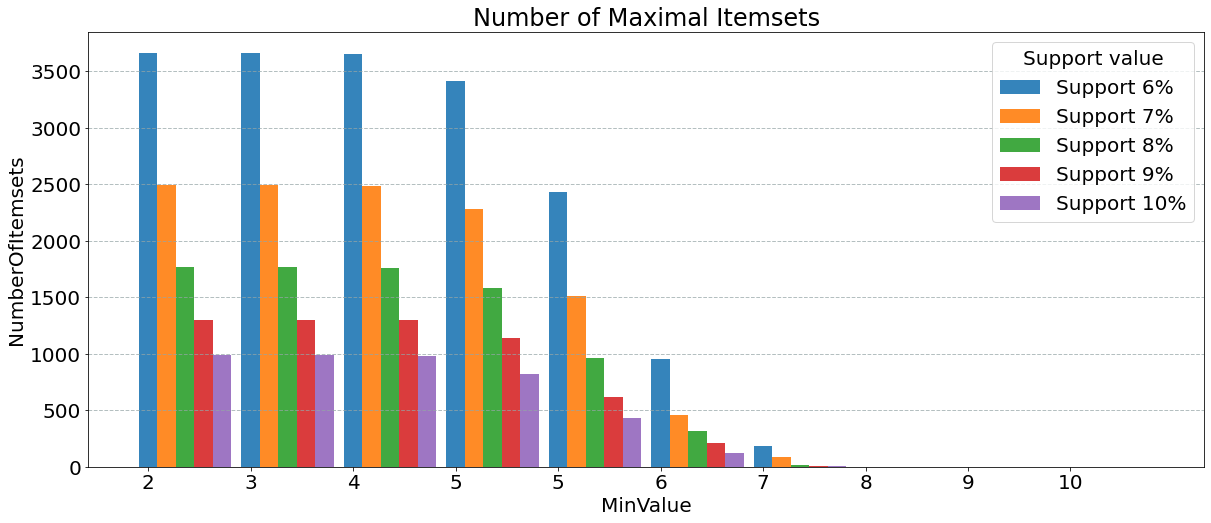

In [155]:
width = 0.18
lables1 =['2','3','4','5','5','6','7','8','9','10']
plt.xticks(range(len(global_list4)), lables1)
plt.bar(range(len(global_list4)), global_list4, alpha=0.9,width=width,label ='Support 6%')
plt.bar(np.arange(len(global_list5))+width, global_list5, alpha=0.9,width=width,label ='Support 7%')
plt.bar(np.arange(len(global_list6))+width+width, global_list6, alpha=0.9,width=width,label ='Support 8%')
plt.bar(np.arange(len(global_list7))+width+width+width, global_list7,alpha=0.9,width=width,label ='Support 9%')
plt.bar(np.arange(len(global_list8))+width+width+width+width, global_list8, alpha=0.9,width=width,label ='Support 10%')

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams.update({'font.size': 20})
plt.legend(loc="best", title="Support value")
plt.xlabel('MinValue')
plt.ylabel('NumberOfItemsets')
plt.title('Number of Maximal Itemsets')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

Total Support

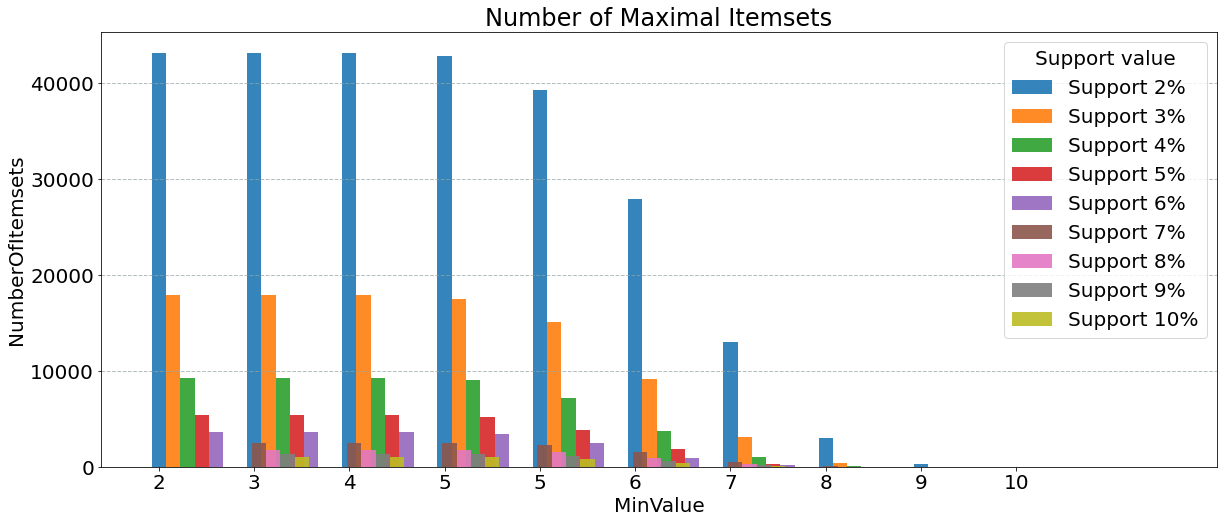

In [156]:
width = 0.15
lables1 =['2','3','4','5','5','6','7','8','9','10']
plt.xticks(range(len(global_list)), lables1)
plt.bar(range(len(global_list)), global_list, alpha=0.9,width=width,label ='Support 2%')
plt.bar(np.arange(len(global_list1))+width, global_list1, alpha=0.9,width=width,label ='Support 3%')
plt.bar(np.arange(len(global_list2))+width+width, global_list2, alpha=0.9,width=width,label ='Support 4%')
plt.bar(np.arange(len(global_list3))+width+width+width, global_list3, alpha=0.9,width=width,label ='Support 5%')
plt.bar(np.arange(len(global_list4))+width+width+width+width, global_list4, alpha=0.9,width=width,label ='Support 6%')
plt.bar(np.arange(len(global_list5))+width+width+width+width+width+width+width, global_list5, alpha=0.9,width=width,label ='Support 7%')
plt.bar(np.arange(len(global_list6))+width+width+width+width+width+width+width+width, global_list6, alpha=0.9,width=width,label ='Support 8%')
plt.bar(np.arange(len(global_list7))+width+width+width+width+width+width+width+width+width, global_list7,alpha=0.9,width=width,label ='Support 9%')
plt.bar(np.arange(len(global_list8))+width+width+width+width+width+width+width+width+width+width, global_list8, alpha=0.9,width=width,label ='Support 10%')

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams.update({'font.size': 20})
plt.legend(loc="best", title="Support value")
plt.xlabel('MinValue')
plt.ylabel('NumberOfItemsets')
plt.title('Number of Maximal Itemsets')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

# Histogram-Closed Itemsets

Closed Itemset with min value in a range 0 to10

In [157]:
import matplotlib.pyplot as plt
global_list=[]
global_list1=[]
global_list2=[]
global_list3=[]
global_list4=[]
global_list5=[]
global_list6=[]
global_list7=[]
global_list8=[]
zmin = 0
for zmin in range (10):
        itemset = apriori(baskets, supp=2, report ='s', target='c',zmin = zmin)
        itemset1 = apriori(baskets, supp=3, report ='s', target='c',zmin = zmin)
        itemset2 = apriori(baskets, supp=4, report ='s', target='c',zmin = zmin)
        itemset3 = apriori(baskets, supp=5, report ='s', target='c',zmin = zmin)
        itemset4 = apriori(baskets, supp=6, report ='s', target='c',zmin = zmin)
        itemset5 = apriori(baskets, supp=7, report ='s', target='c',zmin = zmin)
        itemset6 = apriori(baskets, supp=8, report ='s', target='c',zmin = zmin)
        itemset7 = apriori(baskets, supp=9, report ='s', target='c',zmin = zmin)
        itemset8 = apriori(baskets, supp=10, report ='s', target='c',zmin = zmin)
        global_list.append(len(itemset))
        global_list1.append(len(itemset1))
        global_list2.append(len(itemset2))
        global_list3.append(len(itemset3))
        global_list4.append(len(itemset4))
        global_list5.append(len(itemset5))
        global_list6.append(len(itemset6))
        global_list7.append(len(itemset7))
        global_list8.append(len(itemset8))
        


Da 2 a 5 support

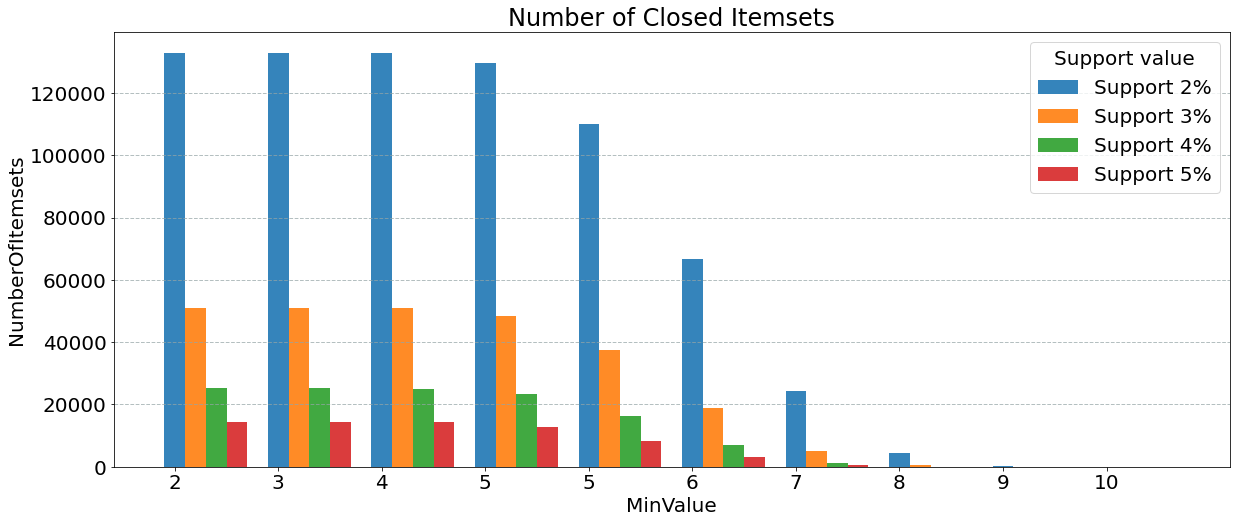

In [158]:
width = 0.2
lables1 =['2','3','4','5','5','6','7','8','9','10' ]
plt.xticks(range(len(global_list)), lables1)
plt.bar(range(len(global_list)), global_list, alpha=0.9,width=width,label ='Support 2%')
plt.bar(np.arange(len(global_list1))+width, global_list1, alpha=0.9,width=width,label ='Support 3%')
plt.bar(np.arange(len(global_list2))+width+width, global_list2, alpha=0.9,width=width,label ='Support 4%')
plt.bar(np.arange(len(global_list3))+width+width+width, global_list3, alpha=0.9,width=width,label ='Support 5%')

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams.update({'font.size': 20})
plt.legend(loc="best", title="Support value")
plt.xlabel('MinValue')
plt.ylabel('NumberOfItemsets')
plt.title('Number of Closed Itemsets')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

Da 6 a 10 support

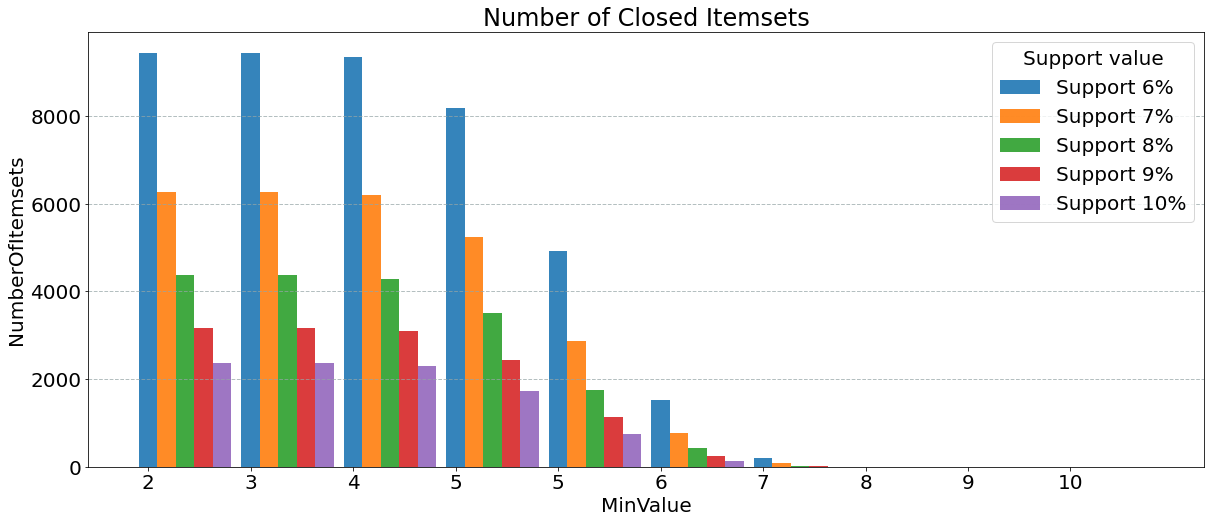

In [159]:
width = 0.18
lables1 =['2','3','4','5','5','6','7','8','9','10']
plt.xticks(range(len(global_list4)), lables1)
plt.bar(range(len(global_list4)), global_list4, alpha=0.9,width=width,label ='Support 6%')
plt.bar(np.arange(len(global_list5))+width, global_list5, alpha=0.9,width=width,label ='Support 7%')
plt.bar(np.arange(len(global_list6))+width+width, global_list6, alpha=0.9,width=width,label ='Support 8%')
plt.bar(np.arange(len(global_list7))+width+width+width, global_list7,alpha=0.9,width=width,label ='Support 9%')
plt.bar(np.arange(len(global_list8))+width+width+width+width, global_list8, alpha=0.9,width=width,label ='Support 10%')

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams.update({'font.size': 20})
plt.legend(loc="best", title="Support value")
plt.xlabel('MinValue')
plt.ylabel('NumberOfItemsets')
plt.title('Number of Closed Itemsets')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()

Total Support

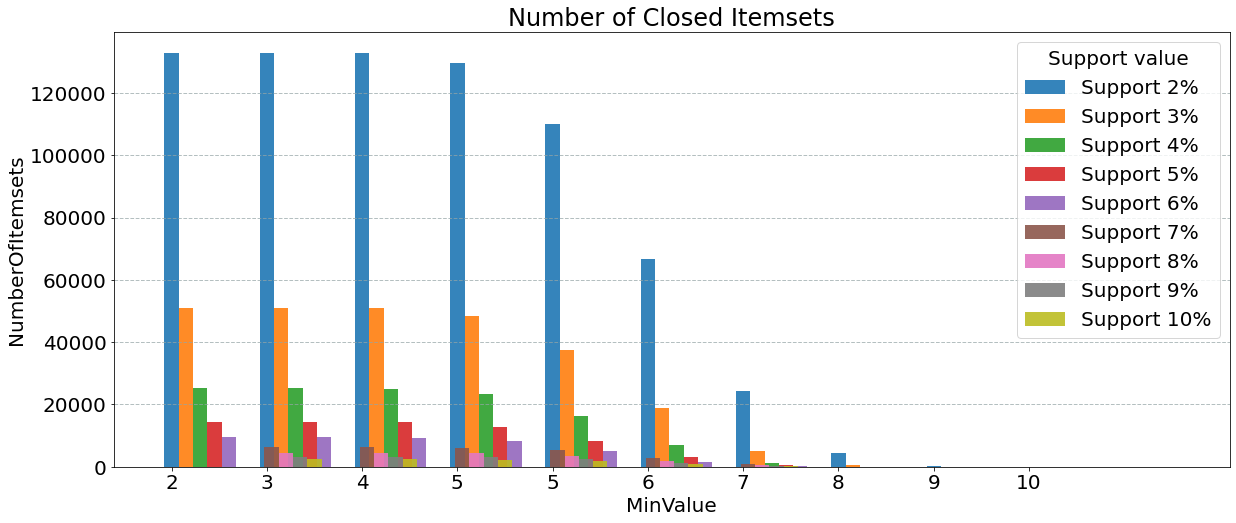

In [160]:
width = 0.15
lables1 =['2','3','4','5','5','6','7','8','9','10']
plt.xticks(range(len(global_list)), lables1)
plt.bar(range(len(global_list)), global_list, alpha=0.9,width=width,label ='Support 2%')
plt.bar(np.arange(len(global_list1))+width, global_list1, alpha=0.9,width=width,label ='Support 3%')
plt.bar(np.arange(len(global_list2))+width+width, global_list2, alpha=0.9,width=width,label ='Support 4%')
plt.bar(np.arange(len(global_list3))+width+width+width, global_list3, alpha=0.9,width=width,label ='Support 5%')
plt.bar(np.arange(len(global_list4))+width+width+width+width, global_list4, alpha=0.9,width=width,label ='Support 6%')
plt.bar(np.arange(len(global_list5))+width+width+width+width+width+width+width, global_list5, alpha=0.9,width=width,label ='Support 7%')
plt.bar(np.arange(len(global_list6))+width+width+width+width+width+width+width+width, global_list6, alpha=0.9,width=width,label ='Support 8%')
plt.bar(np.arange(len(global_list7))+width+width+width+width+width+width+width+width+width, global_list7,alpha=0.9,width=width,label ='Support 9%')
plt.bar(np.arange(len(global_list8))+width+width+width+width+width+width+width+width+width+width, global_list8, alpha=0.9,width=width,label ='Support 10%')

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams.update({'font.size': 20})
plt.legend(loc="best", title="Support value")
plt.xlabel('MinValue')
plt.ylabel('NumberOfItemsets')
plt.title('Number of Closed Itemsets')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.show()